# Introducing marathon results data analysis


There is a lot of information on runners and their performance for many popular marathon races around the world. By analzying the results from the marathon race data, you can get insights to where these runners come from and theirs characteristics. Furthermore, you can do a deep diver into marathon finishing time data in order to extract statistics about average splits time, finishing average pace or even know if you can get into top 10 elite finishers. In this notebook, we are going to explore the historical data from a popular marathon and look at factors such as gender, age, place of origin and other data marathon insights.


## Introduction

2022 is a special year for the Baxters Loch Ness Marathon. It is the 20th edition and it will mark it with a special commemorative finishers t-shirt. The race is quite popular race in UK and it's featured as one of the top 10 bucket list marathons by Runners World readers in 2016. The route takes competitors from the start line in a more remote part of South Loch Ness with incredible views through some of the spectacular scenery in the Highlands, Scotland, along side Loch Ness and finishes in the beautifiul Highland capital of Inverness.

As it happens the data of the Loch Ness Marathon finisher results from the period 2003-2022 are available online, providing access to a lots of data from numbers of participants, gender, age ranges, finish-time, and even the split-time for some editions.  There are more than 30,000 finisher records in what follows we will provide a brief summary of what we can discover from the marathon analysis. 

![Lochness Marathon - 2022](lochness_marathon.png "2022 Loch Ness Marathon")

## Presenting runpandas race results feature

Runpandas is a python package for accessing and analyzing GPS-oriented workouts from running track records. Since the release 0.7.0 the Runpandas added a new feature of accessing and analyzing world-wide marathon race results. This is possible since a great effort from our community to gather from several sources the race results and organize and indexed them so the data analysts can now perform post-race analysis using Pandas DataFrames ans Series. In this example, we will cover this add-on by extracting some statistics from a UK 2003-2022 UK marathon.

### Let's fetch the data

Runpandas package comes with a special method ``runpandas.get_events`` . This function provides a way of accessing the race data and visualize the results from several marathons available at our datasets repository. Given the year and the marathon identifier you can filter any marathon datasets that you want analyze. The result will be a list of ``runpandas.EventData`` instances with race result and its metadata. Let's look for the Loch Ness Marathon results.

In [3]:
import pandas as pd
import runpandas as rpd
import warnings
warnings.filterwarnings('ignore')

/opt/miniconda3/envs/runpandas_dev/lib/python3.8/site-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
results = rpd.get_events('Lochness')
results

[<Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2022>,
 <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2021>,
 <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2019>,
 <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2018>,
 <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2017>,
 <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2016>,
 <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2015>,
 <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2014>,
 <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2013>,
 <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2012>,
 <Event: name=UK Lochness Marathon Results from 2022 to 2003., country=UK, edition=2011>,
 <Event: n

Let's take a look inside of one of results. The 2022 race result for instance. The race event comes with a handful method to describe its attributes and a special method to load the race result data into a `runpandas.datasets.schema.RaceData` instance.

In [5]:
single_2022 = results[0]
print('Event type', single_2022.run_type)
print('Country', single_2022.country)
print('Year', single_2022.edition)
print('Name', single_2022.summary)
print(single_2022.included_data)

Event type RunTypeEnum.MARATHON
Country UK
Year 2022
Name UK Lochness Marathon Results from 2022 to 2003.

[<RaceAttributeEnum.position: 'position'>, <RaceAttributeEnum.bib: 'bib'>, <RaceAttributeEnum.firstname: 'firstname'>, <RaceAttributeEnum.lastname: 'lastname'>, <RaceAttributeEnum.category: 'category'>, <RaceAttributeEnum.grosstime: 'grosstime'>, <RaceAttributeEnum.nettime: 'nettime'>]


In [6]:
#loading the race data into a RaceData Dataframe
race_result = single_2022.load()
race_result

,position,bib,firstname,lastname,half,grosstime,nettime,category
0,1,4276,Dougie,Selman,0 days 01:11:28,0 days 02:23:53,0 days 02:23:52,MS
1,2,1,Isaiah,Kosgei,0 days 01:09:34,0 days 02:26:36,0 days 02:26:35,M40+
2,3,3110,Shaun,Cumming,0 days 01:11:27,0 days 02:26:37,0 days 02:26:35,MS
3,4,3,Chris,Richardson,0 days 01:11:50,0 days 02:28:47,0 days 02:28:45,MS
4,5,4212,Denis,Prikulis,0 days 01:14:23,0 days 02:33:31,0 days 02:33:29,MS
...,...,...,...,...,...,...,...,...
2553,2554,3304,Molka,NaN,0 days 03:26:28,0 days 07:48:00,0 days 07:42:42,FS
2554,2555,1363,Alex,Cavanagh,0 days 03:50:38,0 days 08:06:33,0 days 08:00:22,M50+
2555,2556,2425,Artemis,Gkisdaki,0 days 03:50:43,0 days 08:06:33,0 days 08:00:23,F40+
2556,2557,1662,Sharon,Hill,0 days 03:00:30,0 days 08:28:48,0 days 08:25:06,F50+


Now you can get further information about the Lochness Marathon 2022, by using its tailored methods for getting basic and quick insights. For example, the number of finishers, number of participants and the winner info.

In [7]:
print('Total participants', race_result.total_participants)
print('Total finishers', race_result.total_finishers)
print('Total Non-Finishers', race_result.total_nonfinishers)

Total participants 2558
Total finishers 2558
Total Non-Finishers 0


In [8]:
race_result.winner

position                   1
bib                     4276
firstname             Dougie
lastname              Selman
half         0 days 01:11:28
grosstime    0 days 02:23:53
nettime      0 days 02:23:52
category                  MS
Name: 0, dtype: object

As you can see above, the winner of the 2022 Loch Ness Marathon finished with the time of 02:23:52.  How about the race's summary?

In [9]:
race_result.summary()

Event name                    Lochness marathon
Event type                                  42k
Event country                                UK
Event date                           02-10-2022
Number of participants                     2558
Number of finishers                        2558
Number of non-finishers                       0
Number of male finishers                       
Number of female finishers                     
Winner Nettime                  0 days 02:23:52
dtype: object

## Analyzing all the marathon's historical data


Now that we introduced the runpandas race results package, let's play with the data and try to see if we have some interesting findings. Let's compile all editions into a single dataframe.


In [10]:
#Loop over all the editions, load it, remove the non-finishers and infer the year and concat them into a single dataframe.
all_editions = []
for result in results:
    edition = result.edition
    single_result = result.load()
    only_finishers = single_result[single_result["position"].ne("DNF")]
    only_finishers['Year'] = edition
    all_editions.append(only_finishers)

lochness_data = pd.concat(all_editions)
lochness_data

,position,bib,firstname,lastname,half,grosstime,nettime,category,Year
0,1,4276,Dougie,Selman,0 days 01:11:28,0 days 02:23:53,0 days 02:23:52,MS,2022
1,2,1,Isaiah,Kosgei,0 days 01:09:34,0 days 02:26:36,0 days 02:26:35,M40+,2022
2,3,3110,Shaun,Cumming,0 days 01:11:27,0 days 02:26:37,0 days 02:26:35,MS,2022
3,4,3,Chris,Richardson,0 days 01:11:50,0 days 02:28:47,0 days 02:28:45,MS,2022
4,5,4212,Denis,Prikulis,0 days 01:14:23,0 days 02:33:31,0 days 02:33:29,MS,2022
...,...,...,...,...,...,...,...,...,...
747,748,1063,Catherine,Macneil,NaT,NaT,0 days 06:09:40,F35+,2003
748,749,323,Iain,Stirling,NaT,NaT,0 days 06:16:40,MOPEN,2003
749,750,324,Megan,Coombs,NaT,NaT,0 days 06:16:40,FOPEN,2003
750,751,1115,Annie,Griffiths,NaT,NaT,0 days 07:28:00,F45+,2003


### Who runs the Loch Ness Marathon ?

What people put themselves through 42km,195m of hurt and a cycle of months of training before the marathon? Is the marathon just for the commited few endurance athtletes? The life-long athletes? The over-achievers ? Let's look at the data and see the demographics of the participants.

In [11]:
#We don't have the age and the gender, so we need to infer it from the category data which contains the sex and the age category (Seniors or masters)

race_result.info()

<class 'runpandas.types.frame.RaceResult'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype          
---  ------     --------------  -----          
 0   position   2558 non-null   object         
 1   bib        2558 non-null   object         
 2   firstname  2542 non-null   object         
 3   lastname   2544 non-null   object         
 4   half       2550 non-null   timedelta64[ns]
 5   grosstime  2558 non-null   timedelta64[ns]
 6   nettime    2558 non-null   timedelta64[ns]
 7   category   2558 non-null   object         
dtypes: object(5), timedelta64[ns](3)
memory usage: 160.0+ KB


In [12]:
def get_gender(row):
    if 'F' in row:
        return 'F'
    elif 'M' in row:
        return 'M'
    else:
        return 'UNK'

lochness_data['gender']=lochness_data['category'].apply(get_gender) #infer sex
lochness_data


,position,bib,firstname,lastname,half,grosstime,nettime,category,Year,gender
0,1,4276,Dougie,Selman,0 days 01:11:28,0 days 02:23:53,0 days 02:23:52,MS,2022,M
1,2,1,Isaiah,Kosgei,0 days 01:09:34,0 days 02:26:36,0 days 02:26:35,M40+,2022,M
2,3,3110,Shaun,Cumming,0 days 01:11:27,0 days 02:26:37,0 days 02:26:35,MS,2022,M
3,4,3,Chris,Richardson,0 days 01:11:50,0 days 02:28:47,0 days 02:28:45,MS,2022,M
4,5,4212,Denis,Prikulis,0 days 01:14:23,0 days 02:33:31,0 days 02:33:29,MS,2022,M
...,...,...,...,...,...,...,...,...,...,...
747,748,1063,Catherine,Macneil,NaT,NaT,0 days 06:09:40,F35+,2003,F
748,749,323,Iain,Stirling,NaT,NaT,0 days 06:16:40,MOPEN,2003,M
749,750,324,Megan,Coombs,NaT,NaT,0 days 06:16:40,FOPEN,2003,F
750,751,1115,Annie,Griffiths,NaT,NaT,0 days 07:28:00,F45+,2003,F


In [13]:
def get_age_category(row):
    if '50' in row:
        return 'Master'
    elif '55' in row:
        return 'Master'
    elif '45' in row:
        return 'Master'
    elif '70' in row:
        return 'Master'
    elif '60' in row:
        return 'Master'
    elif 'MS' in row:
        return 'Senior'
    elif 'FS' in row:
        return 'Senior'
    elif 'OPEN' in row:
        return 'Senior'
    elif '35' in row:
        return 'Master'
    elif row in 'MU40':
        return 'Senior'
    elif '40' in row:
        return 'Master'
    elif row in 'Male':
        return 'Senior'
    elif row in 'Female':
        return 'Senior'
    elif row in 'MALE':
        return 'Senior'
    elif row in 'FEMALE':
        return 'Senior'
    elif 'Unknown' in row:
        return 'Unk'
    elif row in 'TBC':
        return 'Senior'
    else:
        return row

lochness_data['age_category']=lochness_data['category'].apply(get_age_category) #infer age category

Now we have two new column infered from the category data: gender (Male, Female or Unknown) and age_category (for male, the under 40' seniors and over 40' masters. For women, the masters applies over 35 years old and seniors under 35'.)

In [14]:
lochness_data

,position,bib,firstname,lastname,half,grosstime,nettime,category,Year,gender,age_category
0,1,4276,Dougie,Selman,0 days 01:11:28,0 days 02:23:53,0 days 02:23:52,MS,2022,M,Senior
1,2,1,Isaiah,Kosgei,0 days 01:09:34,0 days 02:26:36,0 days 02:26:35,M40+,2022,M,Master
2,3,3110,Shaun,Cumming,0 days 01:11:27,0 days 02:26:37,0 days 02:26:35,MS,2022,M,Senior
3,4,3,Chris,Richardson,0 days 01:11:50,0 days 02:28:47,0 days 02:28:45,MS,2022,M,Senior
4,5,4212,Denis,Prikulis,0 days 01:14:23,0 days 02:33:31,0 days 02:33:29,MS,2022,M,Senior
...,...,...,...,...,...,...,...,...,...,...,...
747,748,1063,Catherine,Macneil,NaT,NaT,0 days 06:09:40,F35+,2003,F,Master
748,749,323,Iain,Stirling,NaT,NaT,0 days 06:16:40,MOPEN,2003,M,Senior
749,750,324,Megan,Coombs,NaT,NaT,0 days 06:16:40,FOPEN,2003,F,Senior
750,751,1115,Annie,Griffiths,NaT,NaT,0 days 07:28:00,F45+,2003,F,Master


In [15]:
#Now let's conver the finish time into minutes for better visualization

def convert_to_minutes(row):
    return int(row['nettime'].total_seconds() / 60)

lochness_data['nettime_minutes'] = lochness_data.apply(convert_to_minutes, axis=1) # add a minutes field
lochness_data

,position,bib,firstname,lastname,half,grosstime,nettime,category,Year,gender,age_category,nettime_minutes
0,1,4276,Dougie,Selman,0 days 01:11:28,0 days 02:23:53,0 days 02:23:52,MS,2022,M,Senior,143
1,2,1,Isaiah,Kosgei,0 days 01:09:34,0 days 02:26:36,0 days 02:26:35,M40+,2022,M,Master,146
2,3,3110,Shaun,Cumming,0 days 01:11:27,0 days 02:26:37,0 days 02:26:35,MS,2022,M,Senior,146
3,4,3,Chris,Richardson,0 days 01:11:50,0 days 02:28:47,0 days 02:28:45,MS,2022,M,Senior,148
4,5,4212,Denis,Prikulis,0 days 01:14:23,0 days 02:33:31,0 days 02:33:29,MS,2022,M,Senior,153
...,...,...,...,...,...,...,...,...,...,...,...,...
747,748,1063,Catherine,Macneil,NaT,NaT,0 days 06:09:40,F35+,2003,F,Master,369
748,749,323,Iain,Stirling,NaT,NaT,0 days 06:16:40,MOPEN,2003,M,Senior,376
749,750,324,Megan,Coombs,NaT,NaT,0 days 06:16:40,FOPEN,2003,F,Senior,376
750,751,1115,Annie,Griffiths,NaT,NaT,0 days 07:28:00,F45+,2003,F,Master,448


Let's group the data by year to count the number of finishers, by year and gender to have a glue about the gender distribution among the participants and by age_category (masters, seniors) and year.

In [23]:
agg_year = lochness_data.groupby(["Year"]).agg({'position': ["count"]}).reset_index()
agg_gender_year = lochness_data.groupby(["Year", 'gender']).agg({'position': ["count"]}).unstack(fill_value=0).stack()
agg_gender_year = agg_gender_year.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
agg_category_year = lochness_data.groupby(["Year", 'age_category']).agg({'position': ["count"]}).unstack(fill_value=0).stack()
agg_category_year = agg_category_year.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()

print('% Average female over years', agg_gender_year[agg_gender_year['gender'] == 'F']['position']['count'].mean())
print('% Average masters over the years', agg_category_year[agg_category_year['age_category'] == 'Master']['position']['count'].mean())

% Average female over years 33.57880850628818
% Average masters over the years 52.0813968154838


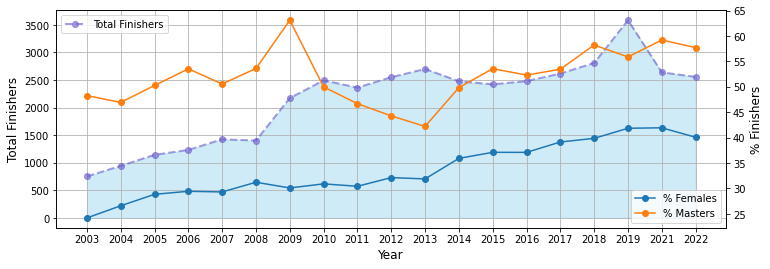

In [17]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,4))
ax2 = ax1.twinx()
ax1.fill_between(agg_year.Year, 
agg_year['position']['count'],
                 color="skyblue", alpha=0.4)
ax1.plot(agg_year.Year, agg_year['position']['count'], color="Slateblue",
         alpha=0.6, linewidth=2,  linestyle='dashed', marker='o', label='Total Finishers')
ax2.plot(agg_year.Year, agg_gender_year[agg_gender_year['gender'] == 'F']['position']['count'],marker='o', label='% Females' )
ax2.plot(agg_year.Year, agg_category_year[agg_category_year['age_category'] == 'Master']['position']['count'],marker='o', label='% Masters' )
ax1.set_xlabel('Year', size=12)
ax1.set_ylabel('Total Finishers', size=12)
ax2.set_ylabel('% Finishers', size=12)
ax1.grid()
ax1.legend(loc=0)
ax2.legend(loc=4)
plt.show()

The Lochness Marathon has experienced a sustained period of growth over the years , until 2019, when we had the pandemic outbreak. These two years 2021 and 2022 comes to our attention due to the participants reduction. When we tried to see the main reason that it could explain it, we found that the famous major London Marathon happened at the same weekend as Lochness. This concorrence might explain that more people prefer to run the London one instead the Loch Ness. Next year, the London will return to the same date as the previous date before the outbreak (April), allowing people to run in second semester our dear Loch ness marathon. As shown above, the 700 or so finishers in the year 20023 almost tripled by 2200 by 2022.

The number of parcipants have been growing, but most of finishers (more than 60%) are still men. Overall the percentage of finishers who are female is about 33% but since 2013 the percentage of female finishers is mostly rising (almost 40%).

When we look at the age of the participants we see a evenly distribution of the seniors x masters. Overall, 



It’s a different story when it comes to the age of participants. Overall, 52% of participants are under 40 years old (for the purpose of this notebook these are referred to as seniors), leaving 48% over 40 (we will refer to these as masters runners). But the proportion of older runners has been growing steadily since 2013. Insteresting to see a peak of more than 60% of masters in 2009, and in 2013, just less half of participantes were over 40.



Now, let's take a look at the pacers, let's find out the distribution of finishers considered the fasters, joggers and the walkers. For this analysis, we group by the data based on the finish times of the participants and classify them as faster runners (finishers within 4 hours), joggers (those finishing between 4 and 6 hours) and walkers (6+ hours).

Pandas has powerful methods to help us in performing this task with a few lines of code like the method ``pandas.cut``.


In [45]:
import numpy as np
groups = ['fasters', 'joggers', 'walkers']
evaluation = [0,240, 360, np.inf]
lochness_data['pacer'] = pd.cut(lochness_data['nettime_minutes'], bins=evaluation, 
                                labels=groups, include_lowest=True, right=False)
lochness_data

,position,bib,firstname,lastname,half,grosstime,nettime,category,Year,gender,age_category,nettime_minutes,pacer
0,1,4276,Dougie,Selman,0 days 01:11:28,0 days 02:23:53,0 days 02:23:52,MS,2022,M,Senior,143,fasters
1,2,1,Isaiah,Kosgei,0 days 01:09:34,0 days 02:26:36,0 days 02:26:35,M40+,2022,M,Master,146,fasters
2,3,3110,Shaun,Cumming,0 days 01:11:27,0 days 02:26:37,0 days 02:26:35,MS,2022,M,Senior,146,fasters
3,4,3,Chris,Richardson,0 days 01:11:50,0 days 02:28:47,0 days 02:28:45,MS,2022,M,Senior,148,fasters
4,5,4212,Denis,Prikulis,0 days 01:14:23,0 days 02:33:31,0 days 02:33:29,MS,2022,M,Senior,153,fasters
...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,748,1063,Catherine,Macneil,NaT,NaT,0 days 06:09:40,F35+,2003,F,Master,369,walkers
748,749,323,Iain,Stirling,NaT,NaT,0 days 06:16:40,MOPEN,2003,M,Senior,376,walkers
749,750,324,Megan,Coombs,NaT,NaT,0 days 06:16:40,FOPEN,2003,F,Senior,376,walkers
750,751,1115,Annie,Griffiths,NaT,NaT,0 days 07:28:00,F45+,2003,F,Master,448,walkers


Now that we have segmented our runners by finish time, let's compute the distribution over the years.

In [50]:
agg_pace_year = lochness_data.groupby(["Year", 'pacer']).agg({'position': ["count"]}).unstack(fill_value=0).stack()
agg_pace_year = agg_pace_year.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()

agg_pace_year

,Year,pacer,position
,,,count
0,2003,fasters,48.670213
1,2003,joggers,50.265957
2,2003,walkers,1.063830
3,2004,fasters,45.656780
4,2004,joggers,52.012712
5,2004,walkers,2.330508
6,2005,fasters,47.027972
7,2005,joggers,50.524476
8,2005,walkers,2.447552


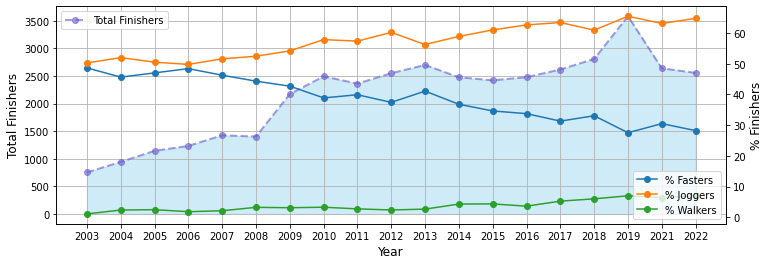

In [51]:
fig, ax1 = plt.subplots(figsize=(12,4))
ax2 = ax1.twinx()
ax1.fill_between(agg_year.Year, 
agg_year['position']['count'],
                 color="skyblue", alpha=0.4)
ax1.plot(agg_year.Year, agg_year['position']['count'], color="Slateblue",
         alpha=0.6, linewidth=2,  linestyle='dashed', marker='o', label='Total Finishers')
ax2.plot(agg_year.Year, agg_pace_year[agg_pace_year['pacer'] == 'fasters']['position']['count'],marker='o', label='% Fasters' )
ax2.plot(agg_year.Year, agg_pace_year[agg_pace_year['pacer'] == 'joggers']['position']['count'],marker='o', label='% Joggers' )
ax2.plot(agg_year.Year, agg_pace_year[agg_pace_year['pacer'] == 'walkers']['position']['count'],marker='o', label='% Walkers' )

ax1.set_xlabel('Year', size=12)
ax1.set_ylabel('Total Finishers', size=12)
ax2.set_ylabel('% Finishers', size=12)
ax1.grid()
ax1.legend(loc=0)
ax2.legend(loc=4)
plt.show()

Loch ness is considered by many running expert reviews as a challenging race due to his course profile. It's predominantly uphill and undulates a lot. This is shown by the numbers here based on percentage of the finishing segments. The percentage of faster runners (those finishing within 4 hours) has been falling, from 48% of participants in 2003 to around 28% by 2022. Meanwhile the percentage of joggers (finishers between 4 and 6 hours) has been steadily increasing to 65%. Finally the percentage of walkers (6+ hours) has remained more or less constant at 2-3%, but since 2016 started to grow, to have 6% in 2022. Loch ness is an exciting race, but it is not easy for the first time marathoners not used to train in uphill conditions.


### Analyzing the finishing times


Let's understand now the average finish-time over the years, let's find out if the race is becoming faster or slower. Based on the chart above, I can bet that the race is turning slower! Let's analyze it.

Below is a graph of the average finish-times for each year, measured across all participants. It also shows separate averages for men and women as well as for seniors (the under 40's) and master (over 40's) participants.


In [89]:
#Average finish-times per year for gender and age category.
agg_pace_year = lochness_data.groupby(["Year"]).agg({'nettime_minutes': ["mean"]}).reset_index()
agg_pace_gender_year = lochness_data.groupby(["Year", 'gender']).agg({'nettime_minutes': ["mean"]}).unstack(fill_value=0).stack().reset_index()
agg_pace_category_year = lochness_data.groupby(["Year", 'age_category']).agg({'nettime_minutes': ["mean"]}).unstack(fill_value=0).stack().reset_index()

agg_pace_year

,Year,nettime_minutes
,,mean
0,2003,247.926862
1,2004,252.345339
2,2005,250.026224
3,2006,248.103001
4,2007,248.324684
5,2008,253.705631
6,2009,254.153705
7,2010,258.353106
8,2011,257.301735


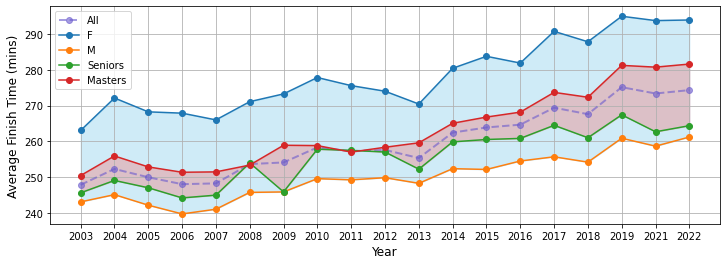

In [88]:
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.fill_between(agg_year.Year,
    agg_pace_gender_year[agg_pace_gender_year['gender'] == 'F']['nettime_minutes']['mean'],
    agg_pace_gender_year[agg_pace_gender_year['gender'] == 'M']['nettime_minutes']['mean'],
                 color="skyblue", alpha=0.4)
ax1.fill_between(agg_year.Year,
    agg_pace_category_year[agg_pace_category_year['age_category'] == 'Senior']['nettime_minutes']['mean'],
    agg_pace_category_year[agg_pace_category_year['age_category'] == 'Master']['nettime_minutes']['mean'],
                 color="lightcoral", alpha=0.4)

ax1.plot(agg_pace_year.Year, agg_pace_year['nettime_minutes']['mean'], color="Slateblue",
         alpha=0.6, linewidth=2,  linestyle='dashed', marker='o', label='All')
ax1.plot(agg_pace_year.Year, agg_pace_gender_year[agg_pace_gender_year['gender'] == 'F']['nettime_minutes']['mean'],marker='o', label='F' )
ax1.plot(agg_pace_year.Year, agg_pace_gender_year[agg_pace_gender_year['gender'] == 'M']['nettime_minutes']['mean'],marker='o', label='M' )
ax1.plot(agg_pace_year.Year, agg_pace_category_year[agg_pace_category_year['age_category'] == 'Senior']['nettime_minutes']['mean'],marker='o', label='Seniors' )
ax1.plot(agg_pace_year.Year, agg_pace_category_year[agg_pace_category_year['age_category'] == 'Master']['nettime_minutes']['mean'],marker='o', label='Masters' )
ax1.set_xlabel('Year', size=12)
ax1.set_ylabel('Average Finish Time (mins)', size=12)
ax1.grid()
ax1.legend(loc=0)
plt.show()

In [92]:
agg_pace_gender_year

,Year,gender,nettime_minutes
,,,mean
0,2003,F,263.071429
1,2003,M,243.178131
2,2003,UNK,226.666667
3,2004,F,272.115538
4,2004,M,245.184704
5,2004,UNK,0.000000
6,2005,F,268.257576
7,2005,M,242.249688
8,2005,UNK,266.384615


As we can see from these results, it suggests a very significant increasing in finish-times for all categories (men and women, young and old). In 2003 the average finish-time was 247 minutes and went just over 274 minutes by 2022, a 30-minute slowness. Yeah, it is not a easy race!

It is also interesting to note how gender has a much greater influence on finish-times than age. For example, the difference between the finish-times of men and women varies from about 85 minutes (in 2000) to 30 minutes (in 2015); yes, women are getting faster relative to their male counterparts. By contrast, the difference in finish-times between senior (20–39 years old) and masters (40+) runners varies by only 10–15 minutes.

